### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [88]:
data = pd.read_csv('data/coupons.csv')

In [89]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [90]:
#show which columns have missing data
print (data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [91]:
 #Show the types of data in the columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [92]:
#Create new column num_age (Numeric Age) for age &
#Change to numeric
conditions = [
    (data['age'] == 'below21'),
    (data['age'] == '21'),
    (data['age'] == '26'),
    (data['age'] == '31'),
    (data['age'] == '36'),
    (data['age'] == '41'),
    (data['age'] == '46'),
    (data['age'] >= '50+')]
values = [20,21,26,31,36,41,46,50]
data['num_age'] = np.select(conditions, values)

#Change the 'Y' column to Boolean (True.False) 
data['Y'] = data['Y'].astype('bool')
#Chech data   print(data['age_grp'].value_counts())
#Chech data   print(data.head())
#
# Car: has too many rows of missing data to delete
# Passanger: is mispelled, but I see no need to correct it
# Bar: remove the na vales from dataset
data = data[data['Bar'].notna()]
# RestaurantLessThan20: remove the na vales from dataset
data = data[data['RestaurantLessThan20'].notna()]
# Didn't need the other data so I didn't do anything to it.



4. What proportion of the total observations chose to accept the coupon? 


### Take the total number of people who said yes to the coupon/total number in the data set

In [93]:

print (((data['Y'].values.sum())/(data['Y'].count())*100), "% choose to accept the coupon")

56.80999279365842 % choose to accept the coupon


5. Use a bar plot to visualize the `coupon` column.

[Text(0.5, 1.0, 'Coupon acceptance by type')]

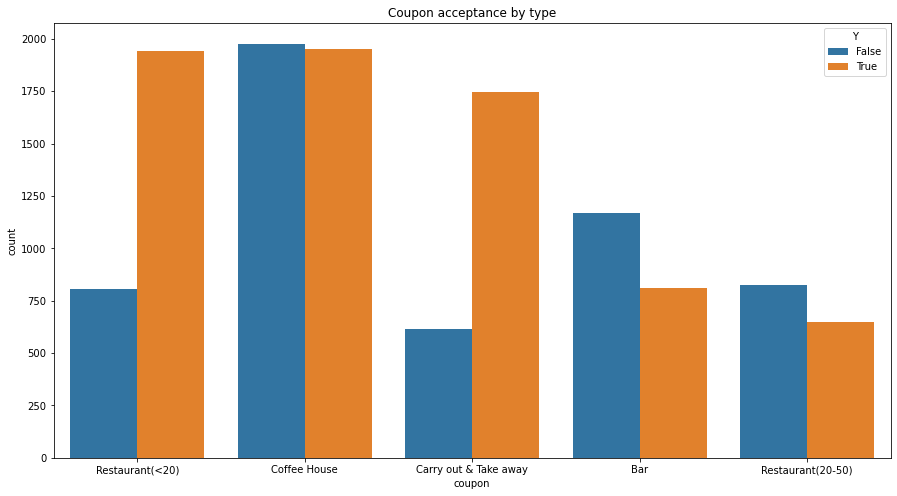

In [94]:
plt.figure(figsize = (15,8))
fig =sns.countplot(data=data, x='coupon', hue = 'Y')
fig.set( title='Coupon acceptance by type')

#Show each type of coupon and it's acceptance rate

6. Use a histogram to visualize the temperature column.

<Figure size 1080x576 with 0 Axes>

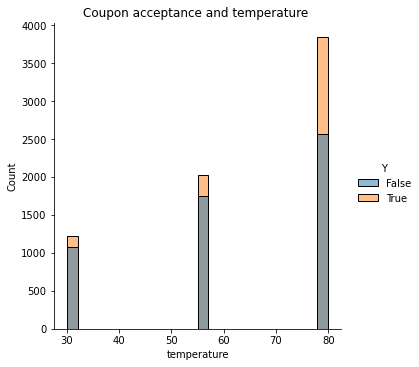

In [95]:
plt.figure(figsize = (15,8))
fig=sns.displot(data=data, x='temperature', hue ="Y")
fig.set( title='Coupon acceptance and temperature ')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [96]:
Bar_df = data[data['coupon'].str.contains("Bar")]


2. What proportion of bar coupons were accepted?

In [97]:
print (((Bar_df['Y'].values.sum())/(Bar_df['Y'].count()))*100, "% Choose to accept the bar coupons")

40.96871846619577 % Choose to accept the bar coupons


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Chance of accepting a bar coupon if they go to a bar 3 or less times per month 36.96017947279866 %
Chance of accepting a bar coupon if they go to a bar 4 or more times per month 76.88442211055276 %


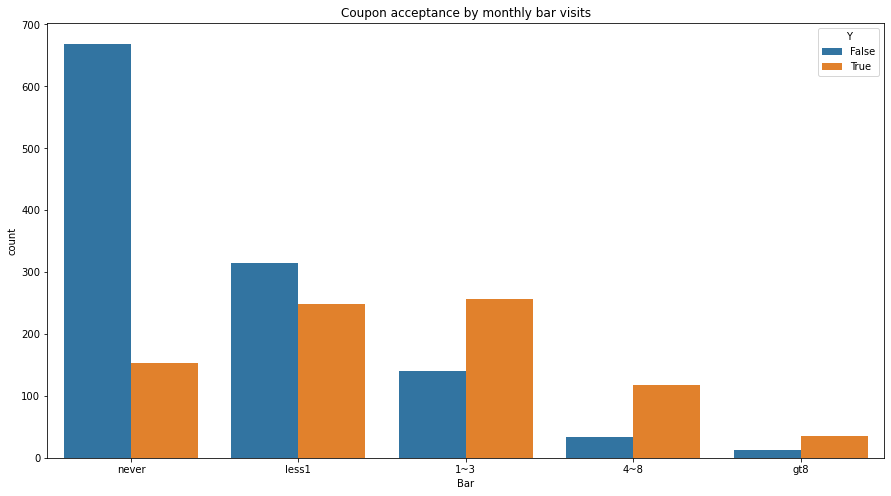

In [98]:
plt.figure(figsize = (15,8))
fig=sns.countplot(data=Bar_df, x='Bar', hue='Y', order = ['never','less1','1~3', '4~8','gt8'])
fig.set( title='Coupon acceptance by monthly bar visits')

#Bar_df_L = data[data['Bar'].str.contains("never") | data['Bar'].str.contains("less1") | data['Bar'].str.contains("1~3")]
#Bar_df_R = data[data['Bar'].str.contains("gt8") | data['Bar'].str.contains("4~8")]
Bar_df_L = Bar_df[Bar_df['Bar'].str.contains("never") | Bar_df['Bar'].str.contains("less1") | Bar_df['Bar'].str.contains("1~3")]
Bar_df_R = Bar_df[Bar_df['Bar'].str.contains("gt8") | Bar_df['Bar'].str.contains("4~8")]

print ('Chance of accepting a bar coupon if they go to a bar 3 or less times per month',(((Bar_df_L['Y'].values.sum())/(Bar_df_L['Y'].count())))*100, '%')
print ('Chance of accepting a bar coupon if they go to a bar 4 or more times per month',(((Bar_df_R['Y'].values.sum())/(Bar_df_R['Y'].count())))*100, '%')




4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [99]:
#Bar_df_L =  >25 &  "never"| "less1
#Bar_df_R =  >25 
Bar_df_L = Bar_df[(Bar_df['num_age'] >25) & (Bar_df['Bar'].str.contains("never") | Bar_df['Bar'].str.contains("less1"))]
Bar_df_R = Bar_df[(Bar_df['num_age'] >25) ]
print ('Chance of accepting a bar coupon if they are over 25 and go to a bar less than 1 time per month =',(((Bar_df_L['Y'].values.sum())/(Bar_df_L['Y'].count())))*100, '%')
print ('Chance of accepting a bar coupon if they are over 25 =',(((Bar_df_R['Y'].values.sum())/(Bar_df_R['Y'].count())))*100, '%')
#Check the data    print(Bar_df_L['num_age'].value_counts())
#Check the data    print(Bar_df_R['num_age'].value_counts())
#Check the data    print(Bar_df_L['Bar'].value_counts())
#Check the data    print(Bar_df_R['Bar'].value_counts())

Chance of accepting a bar coupon if they are over 25 and go to a bar less than 1 time per month = 26.12359550561798 %
Chance of accepting a bar coupon if they are over 25 = 38.373655913978496 %


5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

In [100]:

#Null hypothesis: There will be no difference in coupon acceptance between 
#drivers over 25 who go to a bar more than once a month and
#drivers over 25

#alternative hypothesis: There will be a difference in coupon acceptance between 
#drivers over 25 who go to a bar more than once a month and
#drivers over 25

#Create new str column age_grp in Bar_df for ploting 
conditions = [
    (Bar_df['num_age'] >25) &
    (Bar_df['Bar'].str.contains("never") |
     Bar_df['Bar'].str.contains("less1")),
    (Bar_df['num_age'] >25) &
    (~Bar_df['Bar'].str.contains("never") &
     ~Bar_df['Bar'].str.contains("less1"))
            ]
values = ['>1','all']
Bar_df['age_grp'] = np.select(conditions, values)

#Remove all other age groups
Bar_df = Bar_df[Bar_df['num_age']>25]

# Plot chart
fig = px.histogram(Bar_df, x='age_grp', color = 'Y',
 title='Coupon acceptance by age group')
fig.show()

#Calculate group acceptance rates
Accept = (Bar_df_L['Y'].value_counts())
Total = (Bar_df_L['Y'].count())
print('For the test group',Accept[0], 'rejected the coupon and', Accept[1], 'accepted','for', (Accept[1]/Total),'acceptance rate' )
Accept = (Bar_df_R['Y'].value_counts())
Total = (Bar_df_R['Y'].count())
print('For the populationage group',Accept[0], 'rejected the coupon and', Accept[1], 'accepted','for', (Accept[1]/Total),'acceptance rate' )


C:\Users\micha\AppData\Local\Temp/ipykernel_24220/2096190921.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



For the test group 789 rejected the coupon and 279 accepted for 0.2612359550561798 acceptance rate
For the populationage group 917 rejected the coupon and 571 accepted for 0.38373655913978494 acceptance rate


6. Using alpha at 0.05 test your hypothesis and state your conclusion.

In [101]:
# run Ttest
print(stats.ttest_ind(Bar_df_L['Y'],Bar_df_R['Y']))
# the T test - p value is too low
print('Using alpha at 0.05 and comparing with the P value:')
print( 'The null hypothosis "There will be no difference in coupon acceptance between',
'drivers over 25 who go to a bar more than once a month and',
'drivers over 25" is rejected.')
print()
print('The alternative hypothesis "There will be a difference in coupon acceptance between',
'drivers over 25 who go to a bar more than once a month and',
'drivers over 25" " is accepted')

Ttest_indResult(statistic=-6.534880112360552, pvalue=7.657885459445587e-11)
Using alpha at 0.05 and comparing with the P value:
The null hypothosis "There will be no difference in coupon acceptance between drivers over 25 who go to a bar more than once a month and drivers over 25" is rejected.

The alternative hypothesis "There will be a difference in coupon acceptance between drivers over 25 who go to a bar more than once a month and drivers over 25" " is accepted


7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


[]

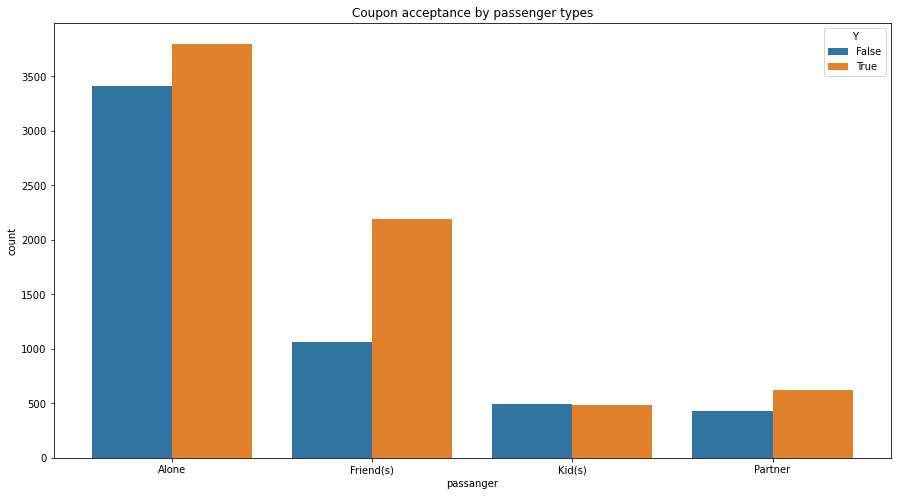

In [102]:
# Lets take a look at acceptance rate based on passengers
plt.figure(figsize = (15,8))
fig=sns.countplot(data=data, x='passanger', hue='Y')
fig.set( title='Coupon acceptance by passenger types')
fig.plot()


[]

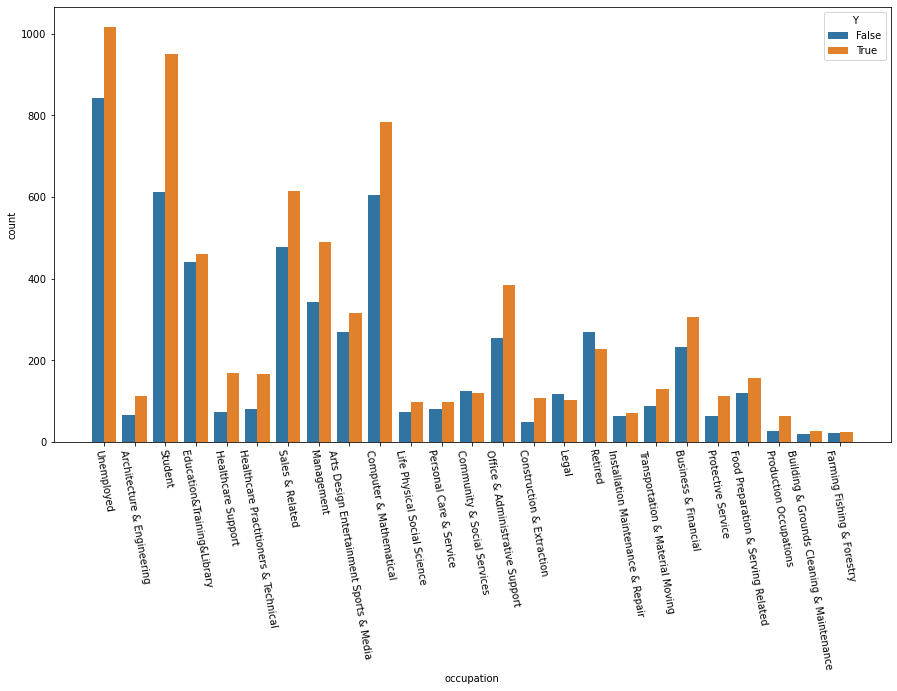

In [103]:
#lets take a look at acceptance rate based on occupation
#Depends on if you are going for most accepted coupons (Unemployed) or highest acceptance rate ( Healthcare, Construction)
# on which group would be the most interesting.
plt.figure(figsize = (15,8))
ax=sns.countplot(data=data, x='occupation', hue='Y')
#Rotate lables
ax.set_xticklabels(ax.get_xticklabels(),rotation = -80)
ax.plot()

In [104]:
#create DatFrame of drivers who go to bars more than once a month and had passengers that were not a kid 
# and had occupations other than farming, fishing, or forestry. 
Bars_ko_df = data[(data['passanger']!="Kid(s)")& (data['occupation']!="Farming Fishing & Forestry")
                  & ~data['Bar'].str.contains("never") & ~data['Bar'].str.contains("less")]            


In [105]:
# Create new column (Group) to sort groups easier
conditions = [~((data['passanger']!="Kid(s)")&
                (data['occupation']!="Farming Fishing & Forestry")&
                ( ~data['Bar'].str.contains("never")
                & ~data['Bar'].str.contains("less"))),
                (data['passanger']!="Kid(s)")&
                (data['occupation']!="Farming Fishing & Forestry")&
                ( ~data['Bar'].str.contains("never")
                & ~data['Bar'].str.contains("less"))]
values = ['Population', 'Group']
data['Group'] = np.select(conditions, values)
data['Group'].value_counts()

# Show the data
plt.figure(figsize = (15,8))
fig = px.histogram(data, x='Group', color = 'Y',
                  title='Coupon acceptance by group')
fig.show()


<Figure size 1080x576 with 0 Axes>

In [106]:
# Calculate acceptance rates
Accept = (Bars_ko_df['Y'].value_counts())
Total = (Bars_ko_df['Y'].count())
print('For the test group,',Accept[0], 'rejected the coupon and', Accept[1], 'accepted','for', (Accept[1]/Total),'acceptance rate' )
Accept = (data['Y'].value_counts())
Total = (data['Y'].count())
print('For the total population,',Accept[0], 'rejected the coupon and', Accept[1], 'accepted','for', (Accept[1]/Total),'acceptance rate' )
print()
# run Ttest
print(stats.ttest_ind(Bars_ko_df['Y'],data['Y']))
print()
print("Using alpha at 0.05 and comparing with the P value, the pvalue is lower than the theshold")
# the T test - p value is too low
print()
print( 'The null hypothosis "There will be no difference in coupon acceptance between',
    'all drivers and those drivers who go to bars more than once a month,',
    ' and had passengers that were not a kid and had occupations other than farming, fishing, or forestry" is rejected.')
print()
print('The alternative hypothesis "There will be a difference in coupon acceptance between',
     'all drivers and those drivers who go to bars more than once a month,',
     ' and had passengers that were not a kid',
     ' and had occupations other than farming, fishing, or forestry." is accepted')

For the test group, 1393 rejected the coupon and 2303 accepted for 0.6231060606060606 acceptance rate
For the total population, 5394 rejected the coupon and 7095 accepted for 0.5680999279365841 acceptance rate

Ttest_indResult(statistic=5.959225082368148, pvalue=2.5869554306308568e-09)

Using alpha at 0.05 and comparing with the P value, the pvalue is lower than the theshold

The null hypothosis "There will be no difference in coupon acceptance between all drivers and those drivers who go to bars more than once a month,  and had passengers that were not a kid and had occupations other than farming, fishing, or forestry" is rejected.

The alternative hypothesis "There will be a difference in coupon acceptance between all drivers and those drivers who go to bars more than once a month,  and had passengers that were not a kid  and had occupations other than farming, fishing, or forestry." is accepted


8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



[Text(0.5, 1.0, 'Bar coupon acceptance based on visits to less expensive restaurant (<$20) & income <$50,000')]

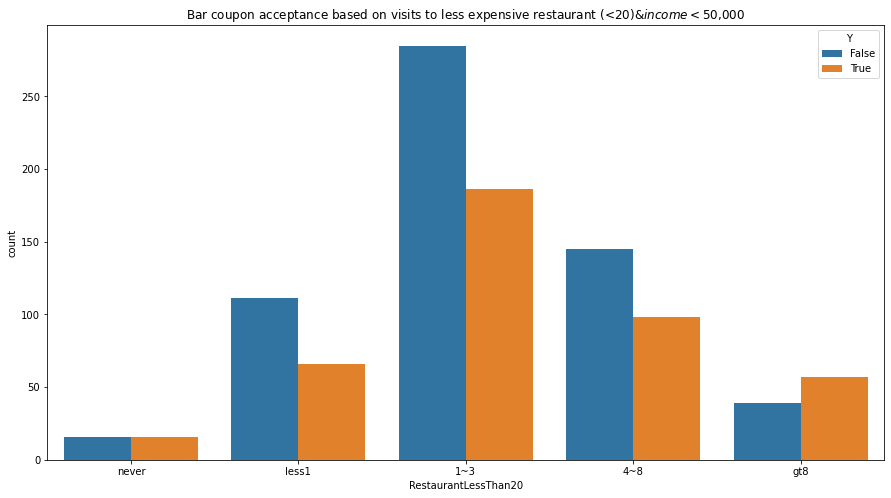

In [107]:
#Create a numeric column based on income (I used the average bewteen the high and low)
conditions = [
    (data['income'] == '$25000 - $37499'),
    (data['income'] == '$12500 - $24999'),
    (data['income'] == '$37500 - $49999'),
    (data['income'] == '$100000 or More'),
    (data['income'] == '$50000 - $62499'),
    (data['income'] == 'Less than $12500'),
    (data['income'] == '$87500 - $99999'),
    (data['income'] == '$62500 - $74999'),
    (data['income'] == '$75000 - $87499')]
values = [31249,18750,43750,100000,56250,12500,93750,68750,81250]
data['num_income'] = np.select(conditions, values)

#Create new dataframe for drivers who got Bar coupons
Bar_df = data[(data['coupon'].str.contains("Bar")) ]

#Look at acceptance by drivers who visit less expensive restaurant (<$20)
plt.figure(figsize = (15,8))
fig =sns.countplot(data=Bar_df.query('num_income <50000'), x='RestaurantLessThan20', hue = 'Y', order = ('never', 'less1', '1~3','4~8', 'gt8' ))
fig.set( title='Bar coupon acceptance based on visits to less expensive restaurant (<$20) & income <$50,000')

[Text(0.5, 1.0, 'Bar coupon acceptance based on visits to less expensive restaurant (<$20) all income levels')]

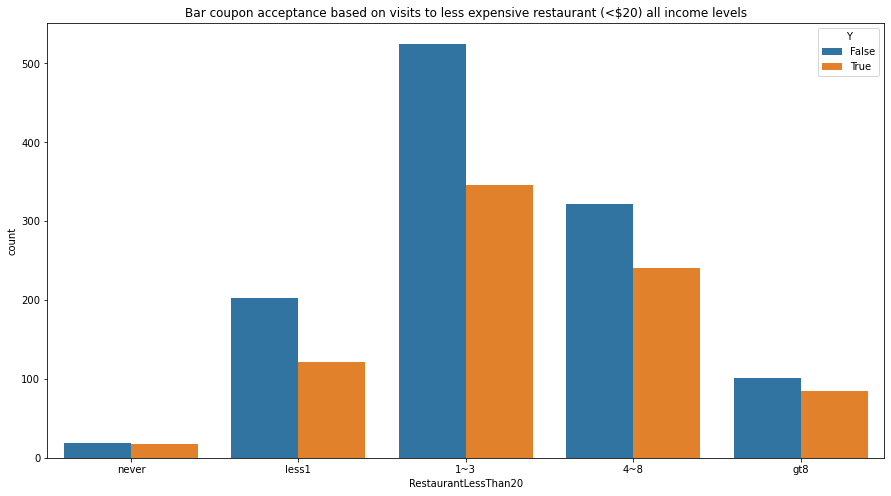

In [108]:
# Look at Bar coupon acceptance based on visits to less expensive restaurant (<$20) all income levels
plt.figure(figsize = (15,8))
fig =sns.countplot(data=Bar_df, x='RestaurantLessThan20', hue = 'Y', order = ('never', 'less1', '1~3','4~8', 'gt8' ))
fig.set( title='Bar coupon acceptance based on visits to less expensive restaurant (<$20) all income levels')

In [109]:
#Bar_ri_gt = Bar coupon_restaurant&income_group test - must have been offered a bar coupon and make less that 50,000
#Bar_ri_gp = Bar coupon_restaurant&income_group population  - must have been offered a bar coupon (all income levels)


#Calculate acceptance rates
Bar_ri_gt = data[((data['coupon'].str.contains("Bar")) & (data['num_income'] <50000)) & ((data['RestaurantLessThan20'] == '4~8') | (data['RestaurantLessThan20'] == 'gt8'))   ]
Accept = (Bar_ri_gt['Y'].value_counts())
Total = (Bar_ri_gt['Y'].count())
print('For the test group,', Accept[0], 'rejected the coupon and', Accept[1], 'accepted','for', (Accept[1]/Total),'acceptance rate' )

Bar_ri_gp = data[(data['coupon'].str.contains("Bar"))]
Accept = (Bar_ri_gp['Y'].value_counts())
Total = (Bar_ri_gp['Y'].count())
print('For the population group,',Accept[0], 'rejected the coupon and', Accept[1], 'accepted','for', (Accept[1]/Total),'acceptance rate' )
print()
# run Ttest
print(stats.ttest_ind(Bar_ri_gt['Y'],Bar_ri_gp['Y']))
print()
print("Using alpha at 0.05 and comparing with the P value, the pvalue is above than the theshold")
# the T test - p value is above
print()
print( 'The null hypothosis "There will be no difference in coupon acceptance between',
    'all drivers and those drivers who go to bars more than once a month,',
    ' go to cheap restaurants more than 4 times a month, and income is less than 50K." is not rejected.')
print()
print('The alternative hypothesis "There will be no difference in coupon acceptance between',
    'all drivers and those drivers who go to bars more than once a month,',
    ' go to cheap restaurants more than 4 times a month, and income is less than 50K." is not accepted')


For the test group, 184 rejected the coupon and 155 accepted for 0.45722713864306785 acceptance rate
For the population group, 1170 rejected the coupon and 812 accepted for 0.40968718466195764 acceptance rate

Ttest_indResult(statistic=1.6409306442988119, pvalue=0.10094742165958862)

Using alpha at 0.05 and comparing with the P value, the pvalue is above than the theshold

The null hypothosis "There will be no difference in coupon acceptance between all drivers and those drivers who go to bars more than once a month,  go to cheap restaurants more than 4 times a month, and income is less than 50K." is not rejected.

The alternative hypothesis "There will be no difference in coupon acceptance between all drivers and those drivers who go to bars more than once a month,  go to cheap restaurants more than 4 times a month, and income is less than 50K." is not accepted


[]

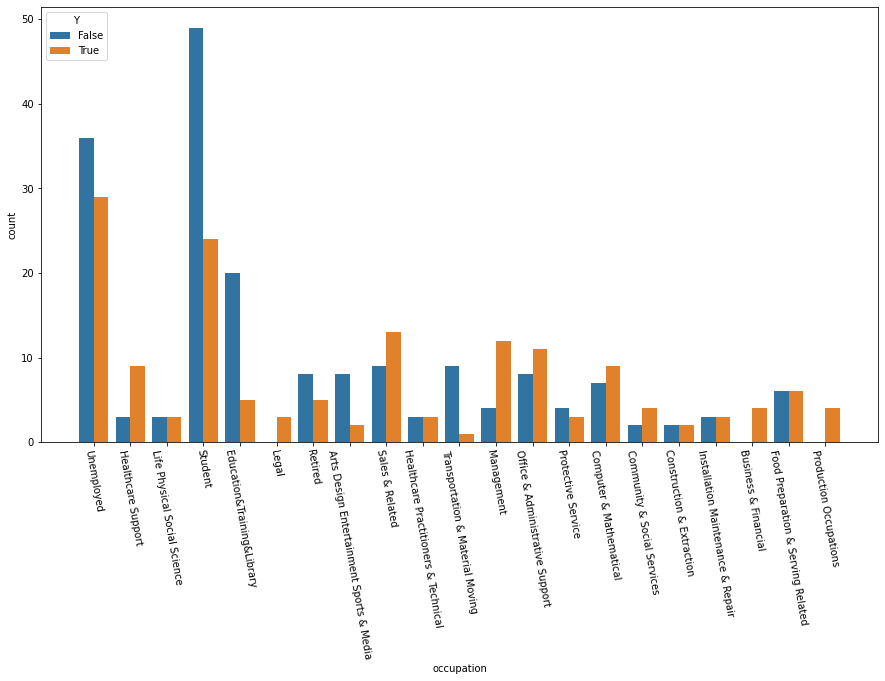

In [110]:
plt.figure(figsize = (15,8))
ax=sns.countplot(data=Bar_ri_gt, x='occupation', hue='Y')
ax.set_xticklabels(ax.get_xticklabels(),rotation = -80)
ax.plot()

9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

In [111]:
# The Drivers were the ones who accepted the coupons, not the passengers. I'm not sure I understand the question.
# If the question is "Based on these observations, what do you hypothesize about passengers 'of the drivers' who accepted the bar coupons?" Then:
# My conclusion is that the passengers of the drivers were more likely friends, rather than children, and were classified as unemployed or students

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### 'The null hypothosis:
There will be no difference in coupon acceptance between drivers who were offered cheaper restaurant coupons, visited cheaper restaurants 1-3 times a month, and the weather was sunny and 80 and all other drivers who were offered cheaper restaurant coupons and visited cheaper restaurants 1-3 times a month

### The alternative hypothosis: 
There will be a difference in coupon acceptance between drivers who were offered cheaper restaurant coupons, visited cheaper restaurants 1-3 times a month, and the weather was sunny and 80 and all other drivers who were offered cheaper restaurant coupons and visited cheaper restaurants 1-3 times a month

First we will create an new dataframe for those drivers who were offered "Restaurant(<20)" coupons 

In [112]:
Rest_df = data[(data['coupon']=="Restaurant(<20)")]

## Explore the data: Fig 1 and Fig 2 show that acceptance rate vs cheaper restaurants visits. 
These charts appear to show that  receiving cheaper restaurants coupon influences coupon acceptance rate more so than just visiting cheaper restaurants.  

Drivers who visited cheaper restaurants and got a cheaper restaurant coupon were more likely to accept it  that all coupons in general 

[Text(0.5, 1.0, 'Fig 1. Acceptance of Restaurant<20 coupon based on restaurant visist per  month')]

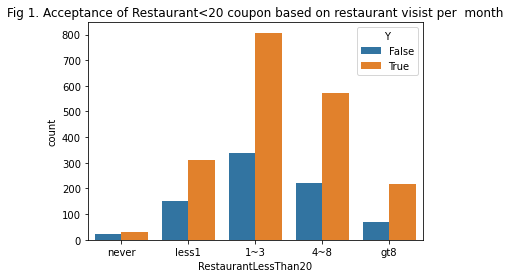

In [113]:
fig1 =sns.countplot(data=Rest_df, x='RestaurantLessThan20', hue = 'Y', order = ('never', 'less1', '1~3','4~8', 'gt8'))
fig1.set(title ='Fig 1. Acceptance of Restaurant<20 coupon based on restaurant visist per  month')

[Text(0.5, 1.0, 'Fig 2. Acceptance of any coupon based on restaurant visist per  month')]

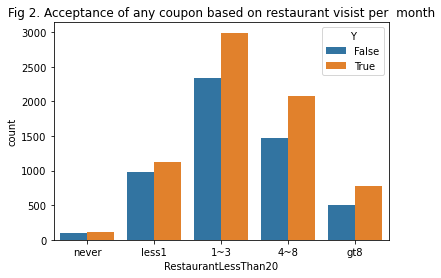

In [114]:
fig2=sns.countplot(data=data, x='RestaurantLessThan20', hue = 'Y', order = ('never', 'less1', '1~3','4~8', 'gt8' ))
fig2.set(title ='Fig 2. Acceptance of any coupon based on restaurant visist per  month')

## Does weather affect coupon acceptance?
Figures 3 and 4 show that sunny weather and 80 degree weather have higher acceptance rates

Figure 5 shows tha Sunny, 80 degree weather combined have a higher acceptance rate.

[Text(0.5, 1.0, 'fig3 Acceptance of Restaurant<20 tickets based on weather')]

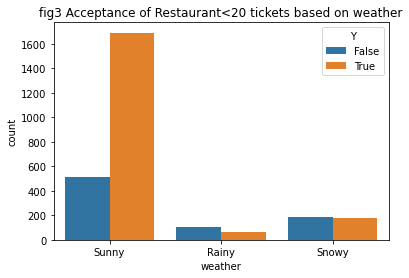

In [115]:
fig3 = sns.countplot(data=Rest_df, x='weather', hue = 'Y')
fig3.set(title ='fig3 Acceptance of Restaurant<20 tickets based on weather')

[Text(0.5, 1.0, 'fig4 Acceptance of Restaurant<20 tickets based on temperature')]

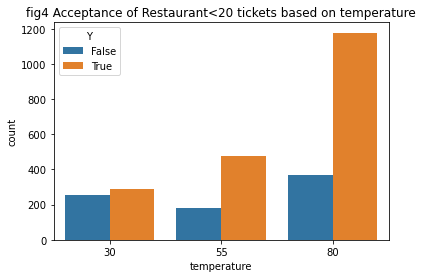

In [116]:
fig4=sns.countplot(data=Rest_df, x='temperature', hue = 'Y')
fig4.set(title ='fig4 Acceptance of Restaurant<20 tickets based on temperature')

[Text(0.5, 1.0, 'fig5 Acceptance of Restaurant<20 tickets based on weather (Sunny and 80)')]

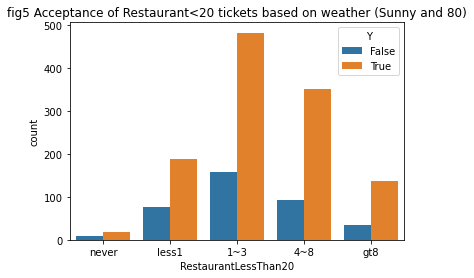

In [117]:
fig5 =sns.countplot(data=Rest_df.query('weather == "Sunny"' and 'temperature == 80'), 
              x='RestaurantLessThan20', hue = 'Y', order = ('never', 'less1', '1~3','4~8', 'gt8' ))
fig5.set(title ='fig5 Acceptance of Restaurant<20 tickets based on weather (Sunny and 80)')

## Does this mean that weather (Sunny and 80) will affect acceptance of 'restaurant' coupons?
We will split that data into two groups

test group = restaurant coupon _weather & temperature (sunny, 80), 1~3 visits
- and - 
population group =  restaurant coupon _ **all** weather and temperatures, 1~3 visits

In [118]:
#Rest_wt1 = restaurant coupon _weather & temperature (sunny, 80), 1~3 visits
#Rest_wt2 = restaurant coupon _weather & temperature (any),1~3 visits  

Rest_wt1 = data[(data['coupon']=="Restaurant(<20)") & (data['weather'] == ('Sunny')) & (data['temperature'] == 80) & (data['RestaurantLessThan20'] == ('1~3'))]
Rest_wt2 = data[(data['coupon']=="Restaurant(<20)") & (data['RestaurantLessThan20'] == ('1~3'))]  

### Calculate acceptance rates

In [119]:
Accept = (Rest_wt1['Y'].value_counts())
Total = (Rest_wt1['Y'].count())
print('For the test group,', Accept[0], 'rejected the coupon and', Accept[1], 'accepted','for', (Accept[1]/Total),'acceptance rate' )


Accept = (Rest_wt2['Y'].value_counts())
Total = (Rest_wt2['Y'].count())

print('For the population group,',Accept[0], 'rejected the coupon and', Accept[1], 'accepted','for', (Accept[1]/Total),'acceptance rate' )


For the test group, 158 rejected the coupon and 482 accepted for 0.753125 acceptance rate
For the population group, 339 rejected the coupon and 807 accepted for 0.7041884816753927 acceptance rate


### Run T test using alpha 0.05

In [120]:
print(stats.ttest_ind(Rest_wt1['Y'],Rest_wt2['Y']))


Ttest_indResult(statistic=2.214645955102566, pvalue=0.02691033216326842)


The null hypothosis: There will be no difference in coupon acceptance between drivers who were offered cheaper restaurant coupons, visited cheaper restaurants 1-3 times a month, and the weather was sunny and 80 and all other drivers who were offered cheaper restaurant coupons and visited cheaper restaurants 1-3 times a month is not rejected. 

I have to admit to being surprized by this outcome. 

Next steps would be to look at which coupons are being influence by weather. Figures 3,4, and 5 would indicate that at least on coupon acceptance rate is correlated with sunny weather at 80 degrees. 